<a href="https://colab.research.google.com/github/jullyon/MVP-2/blob/main/acidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MVP para a disciplina de Análise de Dados e Boas Práticas
### autora: Jullya Letícia Marques da Silva

# Introdução

## Definição do problema

A base de dados utilizada para este projeto é derivada do número de ocorrências de acidentes, consolidadas pela Polícia Rodoviária Federal (PRF) e disponível no site oficial da PRF na parte de Dados Abertos: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf. Esses dados são atualizados mensalmente, sendo responsabilidade da unidade DIOP. Dessa forma, a análise abarca apenas os dados do ano de 2022, devido aos dados incompletos do ano de 2023, que ainda não foi concluído, sendo ignorado dados sobre os anos de 2020 e 2021 para amenizas o efeito da pandemia causada pela diminuição de deslocamento, com medidas tipo home office, entre outras.

Este projeto tem como objetivo realizar uma análise dos dados, incluindo estatística descritiva e a observação de diferentes variáveis, tais como: mês, dia da semana, fase do dia, tipo de pista, traçado da via, causa do acidente, estado e município. Além disso, será explorado o número de vítimas fatais e de pessoas envolvidas em cada ocorrência. Os resultados esperados são: muitos acidentes em grandes metrópoles, alta frequência de ocorrências nos fins de semana e número significativo de acidentes na fase da noite.

## Definindo os atributos

* mortos - número de mortos por ocorrência;
* pessoas - número de pessoas envolvidas por ocorrência;
* dia_semana - dia da semana da ocorrência;
* tipo_pista - tipo de pista, considerando a quantidade de faixas;
* fase_dia - fase do dia no momento do acidente;
* uf - Unidade da Federação (estado brasileiro);
* causa_acidente - causa principal do acidente;
* tracado_via - tipo do traçado da via;
* municipio - nome do município da ocorrência;
* data_inversa - data da ocorrência no formato aaaa/mm/dd.

## Imports

In [1]:
# Análise
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Diretório e carregamento de arquivo

In [2]:
# Definição de diretório (nesse caso, uma url)
url = 'https://raw.githubusercontent.com/jullyon/MVP-2/main/datatran2022.csv'

# Ler o arquivo csv direto do site com o 'read_csv'
Acidentes_2022 = pd.read_csv(url, delimiter=';', encoding='Latin1')

# Selecionar as colunas necessárias para a análise
colunas = ['mortos','pessoas','dia_semana','tipo_pista','fase_dia','uf','causa_acidente','tracado_via','municipio','data_inversa']

# Ler apenas as colunas escolhidas
Acidentes_2022 = Acidentes_2022.loc[:, colunas]

A escolha de ler o arquivo inteiro e depois selecionar as colunas desejadas aconteceu devido ao problema envolvendo as colunas da base, que não estavam sendo lidas de forma corretas no dataset final. Dessa forma, optei por ler todo o arquivo e depois executar o recorte.

## Observação e ajuste na estrutura dos dados

In [3]:
# Exibindo informações sobre a estrutura dos dados
print(Acidentes_2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64547 entries, 0 to 64546
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mortos          64547 non-null  int64 
 1   pessoas         64547 non-null  int64 
 2   dia_semana      64547 non-null  object
 3   tipo_pista      64547 non-null  object
 4   fase_dia        64547 non-null  object
 5   uf              64547 non-null  object
 6   causa_acidente  64547 non-null  object
 7   tracado_via     64547 non-null  object
 8   municipio       64547 non-null  object
 9   data_inversa    64547 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.9+ MB
None


In [4]:
# Transformando o tipo da variável data_inversa, que está com Dtype 'object', para 'datetime'
Acidentes_2022['data_inversa'] = pd.to_datetime(Acidentes_2022['data_inversa'], format='%Y-%m-%d')

# Confirmando a alteração
print(Acidentes_2022['data_inversa'].dtype)


datetime64[ns]


A base dados final possui 10 atributos, sendo 2 do tipo int(inteiro), 1 do tipo datetime (data) e 7 do tipo object (utilizada para textos), contando com 64.547 instâncias ou linhas de informação. Ao transformar o Dtype do atributo 'data_inversa', permitiu que eu trabalhasse com essa variável em formato datetime, facilitando o manuseio dessas informações para filtrar os dados por mês, por exemplo. Assim, utilizei a função 'to_datetime', aplicando também, o formato da data inserida na base. Posteriormente, solicitei um print do Dtype novo dessa variável para confirmar a mudança da função anterior.

In [5]:
# Observando as primeiras linhas da base de dados
Acidentes_2022.head(10)

,mortos,pessoas,dia_semana,tipo_pista,fase_dia,uf,causa_acidente,tracado_via,municipio,data_inversa
0,0,2,sábado,Simples,Plena Noite,PI,Ingestão de álcool pelo condutor,Reta,MARCOLANDIA,2022-01-01
1,1,2,sábado,Dupla,Pleno dia,PR,Ingestão de álcool pelo condutor,Curva,CAMPINA GRANDE DO SUL,2022-01-01
2,0,2,sábado,Simples,Amanhecer,MS,Condutor deixou de manter distância do veículo...,Não Informado,NOVA ALVORADA DO SUL,2022-01-01
3,0,2,sábado,Simples,Pleno dia,RJ,Reação tardia ou ineficiente do condutor,Curva,ANGRA DOS REIS,2022-01-01
4,0,3,sábado,Dupla,Pleno dia,MG,Acumulo de água sobre o pavimento,Reta,RIBEIRAO DAS NEVES,2022-01-01
5,0,2,sábado,Simples,Pleno dia,PB,Mal súbito do condutor,Reta,CACHOEIRA DOS INDIOS,2022-01-01
6,0,3,sábado,Dupla,Pleno dia,MG,Chuva,Desvio Temporário,CAETANOPOLIS,2022-01-01
7,1,4,sábado,Simples,Pleno dia,SC,Ausência de reação do condutor,Não Informado,GUARACIABA,2022-01-01
8,0,4,sábado,Simples,Pleno dia,SC,Condutor deixou de manter distância do veículo...,Não Informado,BALNEARIO CAMBORIU,2022-01-01
9,1,2,sábado,Simples,Pleno dia,CE,Manobra de mudança de faixa,Reta,IPAUMIRIM,2022-01-01


In [6]:
# Observando as últimas linhas da base de dados
Acidentes_2022.tail(10)

,mortos,pessoas,dia_semana,tipo_pista,fase_dia,uf,causa_acidente,tracado_via,municipio,data_inversa
64537,0,1,sábado,Simples,Anoitecer,RJ,Deficiência do Sistema de Iluminação/Sinalização,Reta,VOLTA REDONDA,2022-09-24
64538,0,3,sábado,Simples,Pleno dia,MG,Ingestão de álcool pelo condutor,Curva,IBIA,2022-12-17
64539,0,2,sexta-feira,Simples,Pleno dia,PI,Ausência de reação do condutor,Curva,CAMPO MAIOR,2022-10-14
64540,0,5,segunda-feira,Simples,Pleno dia,PI,Acessar a via sem observar a presença dos outr...,Interseção de vias,LAGOINHA DO PIAUI,2022-11-07
64541,0,3,quarta-feira,Múltipla,Pleno dia,SP,Ausência de reação do condutor,Reta,SAO PAULO,2022-11-16
64542,0,4,domingo,Dupla,Plena Noite,PI,Ausência de reação do condutor,Reta,PICOS,2022-11-06
64543,0,1,terça-feira,Simples,Plena Noite,ES,Velocidade Incompatível,Curva,VIANA,2022-05-03
64544,0,2,terça-feira,Simples,Plena Noite,MG,Transitar na contramão,Reta,BOTELHOS,2022-11-29
64545,0,2,domingo,Múltipla,Pleno dia,CE,Manobra de mudança de faixa,Reta,FORTALEZA,2022-07-31
64546,0,2,quinta-feira,Dupla,Anoitecer,PR,Animais na Pista,Reta,PARANAGUA,2022-11-17


Após revisar as primeiras e últimas linhas do meu conjunto de dados (utilizando head() e tail()) e analisar a presença de valores nulos (info()), constatei que a base está completa e pronta para ser utilizada, sem apresentar ausência de dados.

# Análise dos dados

## Estatísica descritiva e análise inicial

In [7]:
#Estatística descritiva das pessoas envolvidas e do número de mortos
ED = Acidentes_2022.describe()
ED

,mortos,pessoas
count,64547.000000,64547.000000
mean,0.084264,2.405472
std,0.334792,2.069921
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,3.000000
max,7.000000,75.000000


In [8]:
# Número total de pessoas envolvidas em acidentes de trânsito
total_pessoas = Acidentes_2022['pessoas'].sum()
print("Total de pessoas envolvidas:", total_pessoas)

Total de pessoas envolvidas: 155266


In [9]:
# Número total de pessoas mortas no trânsito
total_mortos = Acidentes_2022['mortos'].sum()
print("Total de pessoas mortas:", total_mortos)

Total de pessoas mortas: 5439


A análise inicial dos dados, utilizando a função describe(), revela que a média de pessoas envolvidas por acidente em 2022 foi aproximadamente de 2.41, enquanto a média de mortes foi de 0.084. O número máximo de pessoas envolvidas em um único acidente foi 75, enquanto o número máximo de mortes foi de 7 em um único acidente. Além disso, o total de pessoas envolvidas em acidentes em 2022 foi 155.266, enquanto o número total de mortes ficou em 5.439. Esses resultados foram obtidos por meio da aplicação da função sum() nas variáveis correspondentes.

Ao analisar os quartis, observa-se que em 75% dos acidentes ocorridos em 2022, o número de mortes foi 0. Em relação às pessoas envolvidas, 50% da amostra ficou em torno de 2 pessoas, conforme evidenciado também pelo histograma abaixo. O formato do histograma, distorcido para a direita, indica que a maioria dos acidentes envolveu um pequeno número de pessoas, com a maior parte da amostra envolvendo no máximo 3 pessoas.

### Histograma

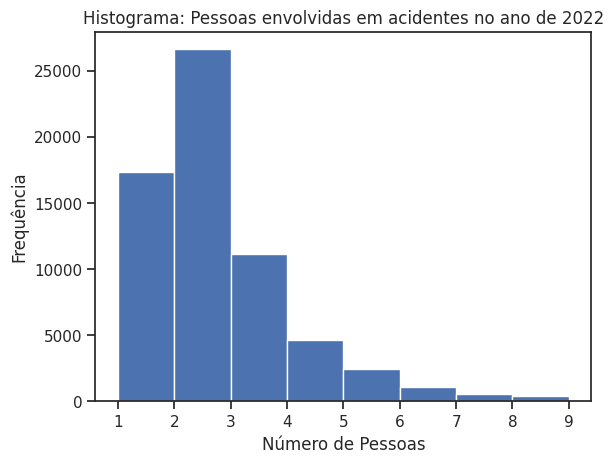

In [10]:
# Histograma para pessoas envolvidas
sns.set_theme(style="ticks")
plt.hist(Acidentes_2022['pessoas'], bins=range(1, 10))
plt.title('Histograma: Pessoas envolvidas em acidentes no ano de 2022')
plt.xlabel('Número de Pessoas')
plt.ylabel('Frequência')

plt.show()

## Análise por dia da semana e período do dia

In [11]:
# Número de acidentes por dia da semana
acidentes_dia = Acidentes_2022['dia_semana'].value_counts()
acidentes_dia

domingo          10969
sábado           10928
sexta-feira       9935
segunda-feira     8818
quinta-feira      8189
quarta-feira      7946
terça-feira       7762
Name: dia_semana, dtype: int64

In [12]:
# Número de acidentes por fase do dia
acid_fase_dia = Acidentes_2022['fase_dia'].value_counts()
acid_fase_dia

Pleno dia      34804
Plena Noite    22856
Anoitecer       3538
Amanhecer       3349
Name: fase_dia, dtype: int64

<Figure size 1000x600 with 0 Axes>

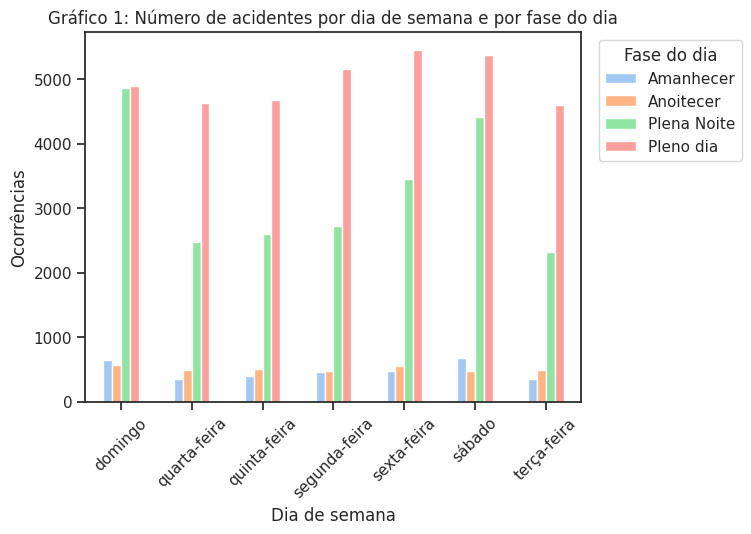

In [13]:
# Número de acidentes por dia e por fase do dia
dia = pd.crosstab(Acidentes_2022['dia_semana'], Acidentes_2022['fase_dia'])

# Gráfico de acidentes por dia e por fase do dia
sns.set_theme(style="ticks", palette= "pastel")
plt.figure(figsize=(10, 6))
dia.plot(kind='bar')
plt.xticks(rotation= 45)
plt.xlabel('Dia de semana')
plt.ylabel('Ocorrências')
plt.title('Gráfico 1: Número de acidentes por dia de semana e por fase do dia')
plt.legend(title='Fase do dia', bbox_to_anchor=(1.02, 1), loc='best')
plt.show()

### Explicação do Gráfico 1

Ao observar o número de acidentes por dia da semana e por fase do dia, percebe-se que os dias de domingo, sabádo e sexta-feira (que compõem o fim de semana), possuem os maiores números de ocorrência, sendo, respectivamente, 10.969, 10.928, 9.935. Enquanto isso, terça-feira fica em último lugar com 7.762 ocorrências. Em relação à fase do dia, percerbe-se que as fases Pleno Dia e Plena noite são os maiores destaques, tendo, repectivamente 34.804 e 22.856, bem distante das outras fases restantes: Anoitecer e Amanhecer, que juntas possuem 6.887. Para verificar a quantidade obtida, foi utilizada a função value_counts(), enquanto a função crosstab() foi utilizada para cruzar os dados do dia da semana com a fase do dia.

No gráfico 1, percebe-se que a fase 'Pleno dia' foi a mais recorrente em todos os dias da semana, tendo uma aproximação maior com Plena Noite apenas no dia de domingo. Enquanto as outras duas fases continuam com números bem baixos, como visto anteriormente. Para a geração do gráfico, foi utilizado o pacote matplotlib, enquanto o pacote seaborn foi utilizado para sua customização. Esses pacotes serão utilizados nos gráficos a seguir.

## Análise por tipo de pista

In [14]:
# Número de acidentes por tipo de pista
acid_pista = Acidentes_2022['tipo_pista'].value_counts()
acid_pista

Simples     31966
Dupla       26795
Múltipla     5786
Name: tipo_pista, dtype: int64

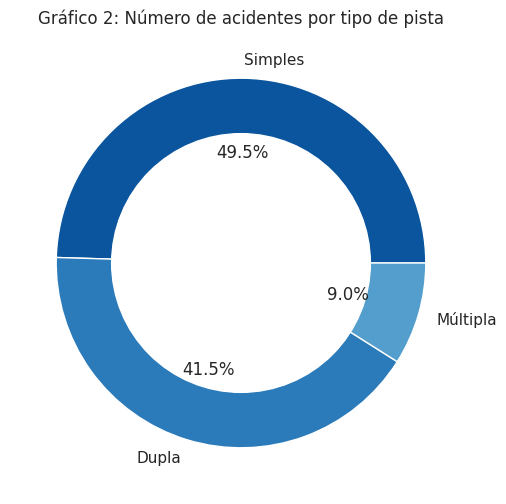

In [15]:
# Número de acidentes por tipo de pista em termos percentuais
acid_pista_pct = Acidentes_2022['tipo_pista'].value_counts(normalize= True) * 100

# Gráfico Número de acidentes por tipo de pista
sns.set_palette("Blues_r")
plt.subplots(figsize=(9, 6))
acid_pista_pct.plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.title('Gráfico 2: Número de acidentes por tipo de pista')

# Gerar espaço em branco dentro do gráfico
circulo=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circulo)

# Plot do gráfico
plt.show()

### Explicação do Gráfico 2

Ao analisar o número de ocorrências por tipo de via, verifica-se que a via Simples possui 31.966 ocorrências, a via Dupla possui 26.795, enquanto a via Múltipla, ficando em último lugar, possui 5.786. Ao observar graficamente (em termos percentuais), verifica-se que os acidentes em pista Simples compõem quase 50% do total, enquanto a via Dupla fica em torno de 41,5%, restando apenas cerca de 9% para a via Múltipla. Além disso, foi utilizada a função 'value_counts(normalize=True)' multiplicada por 100 para gerar os termos percentuais.

## Análise por traçado da via

In [16]:
# Número de acidentes por traçado de via
acid_tracado_via = Acidentes_2022['tracado_via'].value_counts()
acid_tracado_via

Reta                     38971
Não Informado             9283
Curva                     9145
Interseção de vias        2620
Desvio Temporário         1746
Rotatória                 1194
Retorno Regulamentado      730
Viaduto                    436
Ponte                      334
Túnel                       88
Name: tracado_via, dtype: int64

In [17]:
# Número de acidentes por traçado de via em termos percentuais
acid_tracado_via_pct = Acidentes_2022['tracado_via'].value_counts(normalize= True) * 100
acid_tracado_via_pct

Reta                     60.376160
Não Informado            14.381768
Curva                    14.167971
Interseção de vias        4.059058
Desvio Temporário         2.705006
Rotatória                 1.849815
Retorno Regulamentado     1.130959
Viaduto                   0.675477
Ponte                     0.517452
Túnel                     0.136335
Name: tracado_via, dtype: float64

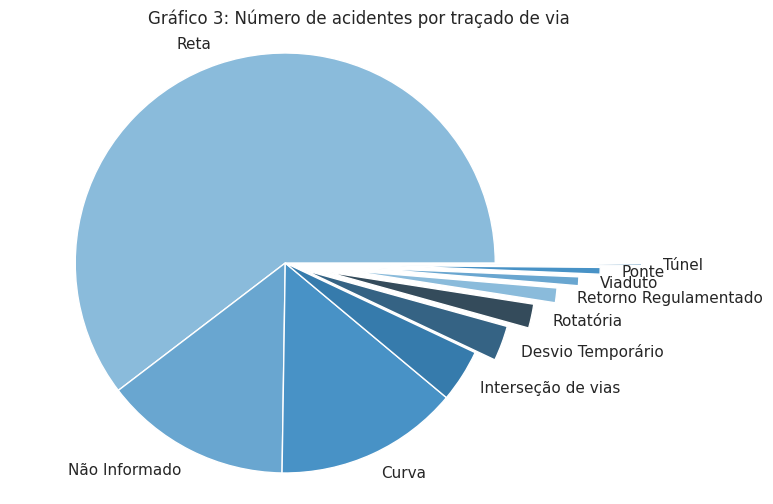

In [18]:
# Gráfico de acidentes por traçado de via
plt.subplots(figsize=(9, 6))
sns.set_palette("Blues_d")
acid_tracado_via_pct.plot(kind='pie', explode = [0, 0, 0, 0, .1, .2, .3, .4, .5, .7])
plt.ylabel('')
plt.title('Gráfico 3: Número de acidentes por traçado de via')
plt.axis("equal")
plt.show()

### Explicação Gráfico 3

Ao analisar o número de acidentes pelo traçado da via, verifica-se que a pista Reta bate recorde, com 38.971 acidentes, em torno de 60,4% da amostra, enquanto o tipo Não Informado de pista fica em segundo lugar, bem próximo da pista Curva, tendo respectivamente, 9.293 e 9.145 ocorrências, os dois ficando em torno de 14%. Enquanto os tipos Viaduto, Ponte e Túnel possuem, respectivamente,  436, 334 e 88 ocorrências, não passando de 0,7%. Além disso, utilizei a função 'explode =[ ]' para gerar esse distanciamento entre as fatias da pizza do gráfico, com intuito de melhorar a visualização.

## Análise por estado

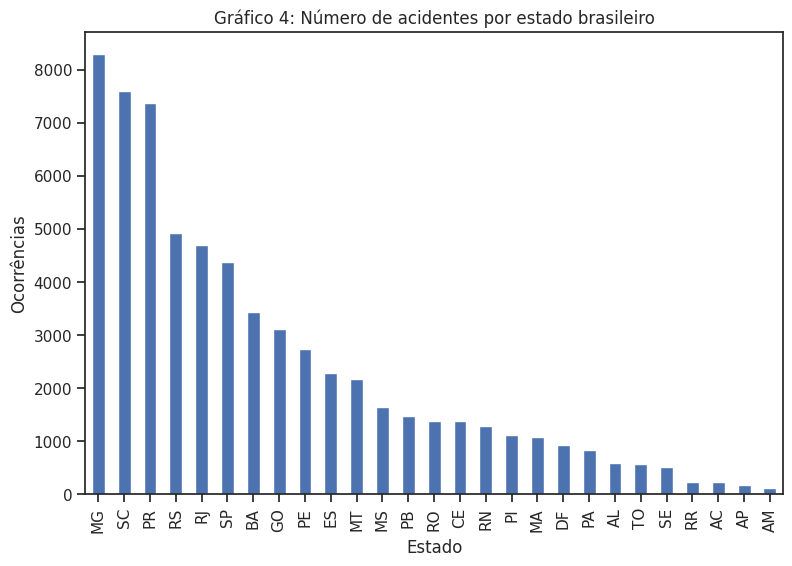

In [19]:
# Número de acidentes por estado
acid_uf = Acidentes_2022['uf'].value_counts().sort_values(ascending=False)

# Gráfico de acidentes por estado
plt.subplots(figsize=(9, 6))
sns.set_theme(style='ticks')
acid_uf.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Ocorrências')
plt.title('Gráfico 4: Número de acidentes por estado brasileiro')
plt.show()

### Explicação Gráfico 4

Analisando o número de acidentes por UF, percebe-se que os estados de Minas Gerais, Santa Catarina e Paraná possuem os maiores números de acidentes, sendo, respectivamente, 8.290, 7.589, 7.377. Assim, é percepítivel uma participação maior da região Sul, tem o Rio Grande do Sul fechando o top 4, em seguida a Sudeste, tendo Rio de Janeiro e São Paulo fechando o top 6 estados brasileiros com maior número de acidadentes em 2022. Enquanto isso, alguns estados da região Norte se destacam com menores quantidades, tendo Roraima com 229, Acre com 224, Amapá com 180 e, por último, Amazonas com 114 ocorrências.

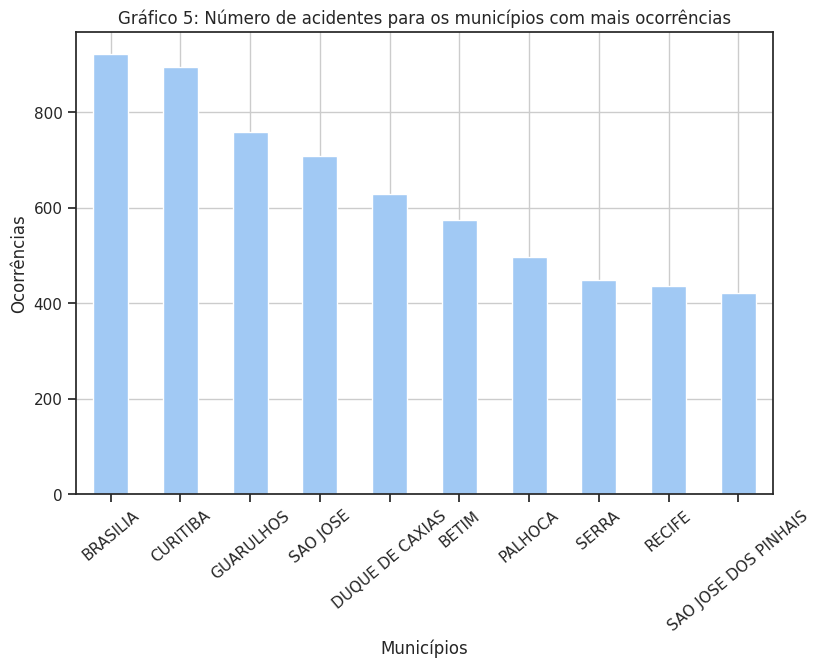

In [20]:
# Os 10 principais municípios com ocorrência de acidentes de trânsito em 2022
acid_mun = Acidentes_2022['municipio'].value_counts().head(10).sort_values(ascending=False)

# Gráfico de acidentes por município
plt.subplots(figsize=(9, 6))
sns.set_theme(style="whitegrid", palette= "pastel")
acid_mun.plot(kind='bar')
plt.xticks(rotation= 40)
plt.xlabel('Municípios')
plt.ylabel('Ocorrências')
plt.title('Gráfico 5: Número de acidentes para os municípios com mais ocorrências')
plt.show()

### Explicação Gráfico 5

Observando os 10 munícipios com maior quantidade de acidentes em 2022, destaca-se Brasília, capital do país, com 922 casos registrados, seguida de Curitiba-PR com 896 e Guarulhos-SP com 759, a primeira não capital a aparecer na lista. Outra capital que também aparece entre as 10 maiores cidade é Recife-PE, com um total de 436, ficando acima apenas de São José dos Pinhais, outra cidade do Paraná, com 421.

## Análise por mês

In [21]:
# Extraindo o mês de cada data registrada na coluna 'data_inversa'
meses_ocorrencia = Acidentes_2022['data_inversa'].dt.month

# Contagem de ocorrências por mês
acid_mes = meses_ocorrencia.value_counts().sort_index()
acid_mes #.sort_values(ascending=False) para visualizar em ordem de maior para menor número de ocorrência

1     5047
2     4866
3     5173
4     5337
5     5397
6     5113
7     5657
8     5605
9     5525
10    5783
11    5222
12    5822
Name: data_inversa, dtype: int64

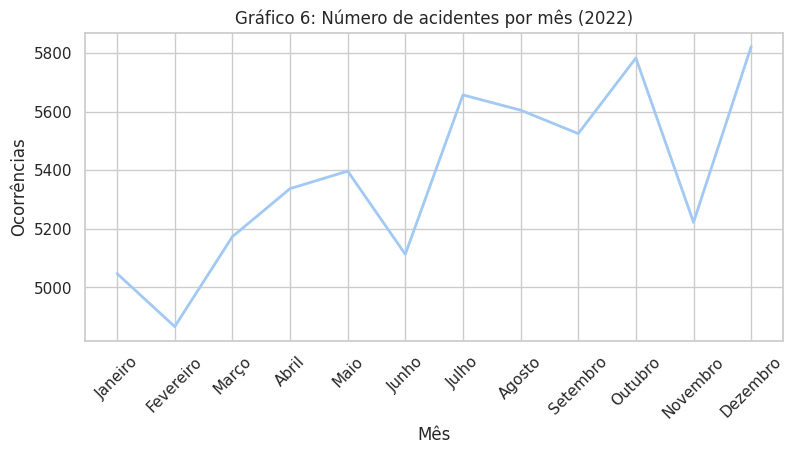

In [22]:
# Gráfico de acidentes por mês
plt.subplots(figsize=(9, 4))
sns.set_theme(style="darkgrid")
acid_mes.plot(linewidth=2)
plt.xticks(range(1,13), ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'],rotation=45)
plt.xlabel('Mês')
plt.ylabel('Ocorrências')
plt.title('Gráfico 6: Número de acidentes por mês (2022)')
plt.show()


### Explicação Gráfico 6

Ao analisar a quantidade de acidentes pelos meses de 2022, percebe-se que dezembro é o mês com maior ocorrência de acidentes, com um total de 5.822 ocorrências, estando bem próximo dos meses de Outubro e Julho, com, respectivamente, 5.783 e 5.605. Além disso, ao observar o gráfico 6, percebe-se algumas quebras durante o ano, sendo evidentes nos meses de Fevereiro, Junho, Setembro e Novembro, que possuíram os menores números de ocorrências. Com o 'data_inversa' em formato datetime, consegui extrair apenas os meses dos dados, utilizando a função 'dt.month', utilizando também o 'sort_index()' para classificar o resultado pela ordem correta dos meses. Além disso, utilizei o 'plt.xticks' para renomear os meses (que estavam em forma númerica) para uma melhor visualização do gráfico.

## Análise do número de mortos por causa do acidente

In [23]:
# Número de mortos por tipo de causa de acidente (top 10)
mortes_causa = Acidentes_2022.groupby('causa_acidente')['mortos'].sum().sort_values(ascending=False).head(10)
mortes_causa

causa_acidente
Transitar na contramão                                       784
Reação tardia ou ineficiente do condutor                     564
Ausência de reação do condutor                               513
Velocidade Incompatível                                      512
Ultrapassagem Indevida                                       394
Acessar a via sem observar a presença dos outros veículos    362
Pedestre andava na pista                                     288
Entrada inopinada do pedestre                                209
Condutor Dormindo                                            206
Manobra de mudança de faixa                                  204
Name: mortos, dtype: int64

### Explicação

Ao analisar as 10 maiores causas de acidentes causadoras de fatalidades, pode-se verificar que o principal fator é transitar na contramão, com um total de 784 pessoas mortas, seguido da Reação tardia ou ineficiente do condutor e Ausência de reação do condutor com, respectivamente 564 e 513 número de mortos. Ao observar esses fatores, é perceptível que grande parte das causas é provocada por certa negligência do condutor, como dificuldades para reação, ultrapassagem indevida, velocidade incompátivel, condutor dormindo, etc. A outra parte, com um menor número de casos, é relacionada aos pedestres, como sua entrada inopinada (inesperada) ou estar andando na pista.

# Conclusão

Neste MVP, foi possível analisar os registros de ocorrências de acidentes pela PRF em 2022, totalizando 64.547 incidentes. Ao explorar os 10 atributos escolhidos, identificou-se que dezembro foi o mês com o maior número de acidentes, enquanto fevereiro teve a menor taxa. Observou-se que os fins de semana, especialmente domingo, concentrou a maioria dos acidentes, em contraste com terça-feira, que teve menos ocorrências.

Quanto às fases do dia, os períodos de Pleno Dia e Plena Noite tiveram significativamente mais ocorrências em comparação com Amanhecer e Anoitecer. Em relação ao tipo e traçado de pista, destacaram-se as vias de tipo simples e pistas com traçado reto. Além disso, a principal causa registrada foi transitar na contramão, apontando a negligência do condutor como uma das principais razões para os acidentes.

No contexto geográfico, estados das regiões Sul e Sudeste se destacaram, com Minas Gerais e Santa Catarina entre os seis estados com maior número de ocorrências. Entre os municípios, Brasília e Curitiba lideraram em número de acidentes.